In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

# Define the path to your dataset
PATH = 'C:\\Users\\VICTUS\\Documents\\2024\\TENSORFLOW\\CatsAndDogs\\cats_and_dogs'

# Define directories
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Check if directories exist
if not os.path.exists(train_dir):
    raise ValueError(f"El directorio de entrenamiento no existe: {train_dir}")
if not os.path.exists(validation_dir):
    raise ValueError(f"El directorio de validación no existe: {validation_dir}")
if not os.path.exists(test_dir):
    raise ValueError(f"El directorio de prueba no existe: {test_dir}")

# Get number of files in each directory
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Print the number of files
print(f"Total de imágenes de entrenamiento: {total_train}")
print(f"Total de imágenes de validación: {total_val}")
print(f"Total de imágenes de prueba: {total_test}")

# Variables for pre-processing and training
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


Total de imágenes de entrenamiento: 2001
Total de imágenes de validación: 1001
Total de imágenes de prueba: 51


In [3]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

FIRST PART
- Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

SECOND PART
- For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

In [4]:
# 3 --> HERE I HAVE TO RUN CODE


train_image_generator = ImageDataGenerator(
    rescale = 1./255 #normalize pixel values to 0,1
)

validation_image_generator = ImageDataGenerator(
    rescale = 1./255 #normalize pixel values to 0,1
)

test_image_generator = ImageDataGenerator(
    rescale = 1./255 #normalize pixel values to 0,1
)


In [12]:
train_data_gen = train_image_generator.flow_from_directory(
    directory='C:\\Users\\VICTUS\\Documents\\2024\\TENSORFLOW\\CatsAndDogs\\cats_and_dogs\\train',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode='binary',
    shuffle=False
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory='C:\\Users\\VICTUS\\Documents\\2024\\TENSORFLOW\\CatsAndDogs\\cats_and_dogs\\validation',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode=None,
    shuffle=False
)
test_data_gen = train_image_generator.flow_from_directory(
    directory='C:\\Users\\VICTUS\\Documents\\2024\\TENSORFLOW\\CatsAndDogs\\cats_and_dogs\\test',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size = batch_size,
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


!!!!

CELL 4
- The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

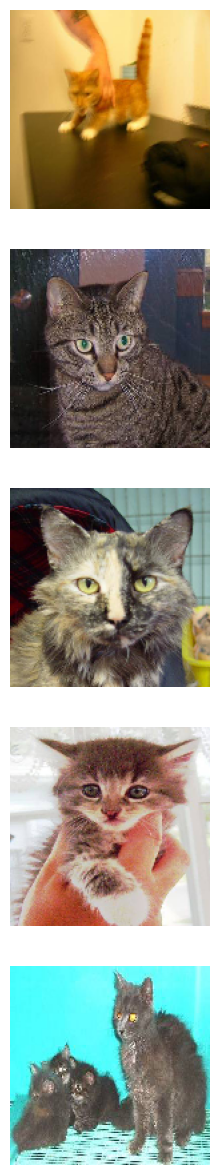

In [13]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


CELL 5

- Recreate the train_image_generator using ImageDataGenerator.

- Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

- Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

In [15]:
# 5

train_image_generator = ImageDataGenerator(
    rescale = 1./255, #normalize pixel values to 0,1
    rotation_range = 40, #gira las imagenes
    width_shift_range = 0.2, #desplaza las imagenes horizontalmente
    height_shift_range = 0.2, #desplaza las imagenes verticalmente
    shear_range = 0.2, #aplica transformacion de corte a las imagenes
    zoom_range = 0.2, #zoom aleatorio dentro de un rango del 20%
    horizontal_flip = True, #invierte las imagenes horizontalmente al azar
    fill_mode = 'nearest' #especifica como rellenar los pixeles vacios q se crean despues de aplciar transformaciones como desp o rotacion
)



CELL 6
- You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


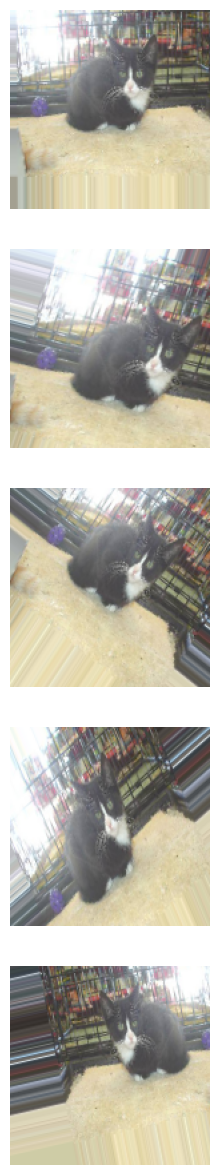

In [16]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

CELL 7
- In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [17]:
from tensorflow import keras

In [21]:
# 7
#model = Sequential()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Capa convolucional (filtros 32, tamaño kernel 3x3)
    keras.layers.MaxPooling2D((2, 2)),  # Capa de agrupación (pooling 2x2)
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # Segunda capa convolucional
    keras.layers.MaxPooling2D((2, 2)),  # Segunda capa de agrupación
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Tercera capa convolucional
    
    keras.layers.Flatten(),  # Aplana el tensor 3D a 1D para conectar con la capa densa
    keras.layers.Dense(64, activation='relu'),  # Capa totalmente conectada
    keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 clases
])





c:\Users\VICTUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer ='adam', #ajusta los pesos del modelo para minimizar la funcion de perdida
              loss='sparse_categorical_crossentropy', #identifica cuan bien se desempe;a el modelo, sparse.. se usa en problemas de clasificacion con etiquetas enteras
              metrics=['accuracy']) #metrica

CELL 8
- Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

In [ ]:
# 8
history = None

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")